In [1]:
try
    using BenchmarkTools
catch
    using Pkg
    Pkg.add("BenchmarkTools")
end
print(varinfo(IJulia));
using StackTraces
using Pkg
using CSV
using DataFrames
using MLDataUtils, Knet
using IJulia
using LinearAlgebra


using StatsPlots
if ! isfile("BostonHousing.csv")
    run(`wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv`)
end
boston = CSV.File("BostonHousing.csv")
bostonf = DataFrame(boston);
first(bostonf,6)

| name          |        size | summary                      |
|:------------- | -----------:|:---------------------------- |
| IJulia        | 389.215 KiB | Module                       |
| Msg           |   300 bytes | DataType                     |
| installkernel |     0 bytes | typeof(IJulia.installkernel) |
| jupyterlab    |     0 bytes | typeof(IJulia.jupyterlab)    |
| msg_pub       |     0 bytes | typeof(IJulia.msg_pub)       |
| msg_reply     |     0 bytes | typeof(IJulia.msg_reply)     |
| notebook      |     0 bytes | typeof(IJulia.notebook)      |
| send_ipython  |     0 bytes | typeof(IJulia.send_ipython)  |
| send_status   |     0 bytes | typeof(IJulia.send_status)   |


ArgumentError: ArgumentError: Package StackTraces not found in current path:
- Run `import Pkg; Pkg.add("StackTraces")` to install the StackTraces package.


In [2]:
#print([col for col in eachcol(bostonf)])
print(names(bostonf))


UndefVarError: UndefVarError: bostonf not defined

In [1]:
@doc(Conv)

No documentation found.

Binding `Conv` does not exist.


In [3]:
using Pkg
try 
   using DataFrames

catch
    
   Pkg.add("DataFrames")
end
using CSV
file = "BostonHousing.csv"
df = DataFrame(CSV.File(file))
lstat = df[:lstat]
medv = df[:medv]
print(names(df))

Symbol[:crim, :zn, :indus, :chas, :nox, :rm, :age, :dis, :rad, :tax, :ptratio, :b, :lstat, :medv]

Set up the environment.

In [4]:

using Pkg
using IJulia
using Knet;
using DataFrames
using Plots;
using StatsPlots;

include(Knet.dir("data","housing.jl"));
x,y = housing();


In [5]:
print(typeof(x))
#varinfo()
varinfo()

Array{Float64,2}

| name    |        size | summary                                      |
|:------- | -----------:|:-------------------------------------------- |
| Base    |             | Module                                       |
| Core    |             | Module                                       |
| Main    |             | Module                                       |
| df      | 102.594 KiB | 506×14 DataFrame                             |
| file    |    25 bytes | String                                       |
| housing |     0 bytes | typeof(housing)                              |
| lstat   |   7.945 KiB | 506-element Array{Union{Missing, Float64},1} |
| medv    |   7.945 KiB | 506-element Array{Union{Missing, Float64},1} |
| x       |  51.430 KiB | 13×506 Array{Float64,2}                      |
| y       |   3.992 KiB | 1×506 Array{Float64,2}                       |


# Which features are we plotting against

# y 13 is lstat

  0.382937 seconds (581.91 k allocations: 29.221 MiB, 8.08% gc time)


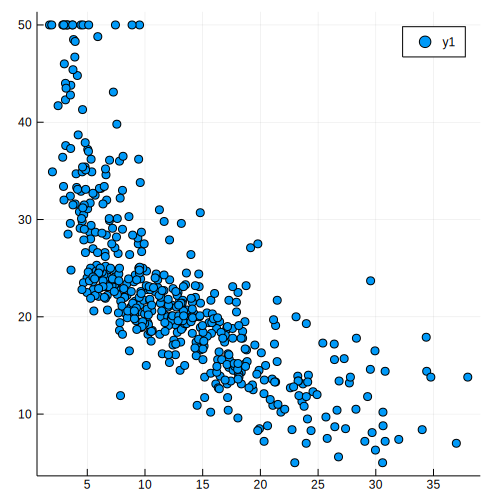

In [6]:
#scale()
using LinearAlgebra
#norm()#!(df[:lstat], Inf)
#x = lstat = df[:lstat]./norm(df[:lstat]);
#y = medv = df[:medv]#./norm(df[:medv]);
p2 = scatter(lstat,medv)
@time plot(p2, layout=(1,1), size=(500,500))

In [7]:
#=


gr();
#lstat = df[:lstat]./sqrt(sumabs2(df[:lstat], dim))
#medv = norm()
#medv = df[:medv]./sqrt(sumabs2(df[:medv], dim))
#y1
gr();
p1 = scatter(x', medv, layout=(3,5), reg=true, size=(950,500))


plot(p1, layout=(1,1), size=(950,500))

=#


In [8]:
#=
gr();

p0 = scatter(x', norm(lstat), layout=(3,5), reg=true, size=(950,500))


plot(p0, layout=(1,1), size=(950,500))
=#

In [9]:


#Now that we have the data
predict(ω, x) = ω[1] * x .+ ω[2];
loss(ω, x, y) = mean(abs2, predict(ω, x)-y);
lossgradient = grad(loss);

function train(ω, data; learning_rate=0.01)
    for (x,y) in data
        #print(size(x),size(y),size(ω))
        dω = lossgradient(ω, x, y)
        for i in 1:length(ω)
            ω[i] -= dω[i]*learning_rate
        end
    end
    return ω
end;

function train_1d(ω, data; learning_rate=0.01)
    for (x,y) in data
        dω = lossgradient(ω, x, y)
        for i in 1:length(ω)
            ω[i] -= dω[i]*learning_rate
        end
    end
    return ω
end;

ω = Any[ 0.1*randn(size(lstat))]#, 0.0 ];
ω = ω[1] 

506-element Array{Float64,1}:
  0.045205126071244876 
 -0.0024130364597549706
  0.12378268137063693  
 -0.22191413251685377  
  0.016663988923660982 
  0.023355882301399525 
 -0.17474864268434284  
  0.0075326605347687875
  0.006281301645485487 
  0.18986921352928493  
 -0.015347757337810795 
  0.0026058876471457106
 -0.03665125239499239  
  ⋮                    
  0.021085104545417822 
  0.22046589618947096  
 -0.09529440849667503  
 -0.03992064680650247  
  0.0689661876513463   
  0.08849557414009686  
  0.027831587657189807 
 -0.06362857562028754  
 -0.10525740843940223  
 -0.13306872851599613  
 -0.13889299058587912  
 -0.02664997658650281  

In [18]:

ω = Any[ 0.1*randn(1,13), 0.0 ];
errdf = DataFrame(Epoch=1:120, Error=0.0);
let
    cntr=1
    cntr::Int64
    #println(cntr)
    @time for i=1:120
        train(ω, [(x,y)])
        #if mod(i, 10) == 0
        #println("Epoch $i: $(round(loss(ω,x,y)))")
        errdf[cntr, :Epoch]=i
        errdf[cntr, :Error]=loss(ω,x,y)
        cntr+=1
        end
    end
end

  0.015810 seconds (19.68 k allocations: 4.700 MiB)


LoadError: syntax: unexpected "end"

In [19]:
last(errdf,6)
first(errdf,6)

,Epoch,Error
,Int64,Float64
1,1,565.378
2,2,538.747
3,3,514.333
4,4,491.781
5,5,470.816
6,6,451.216


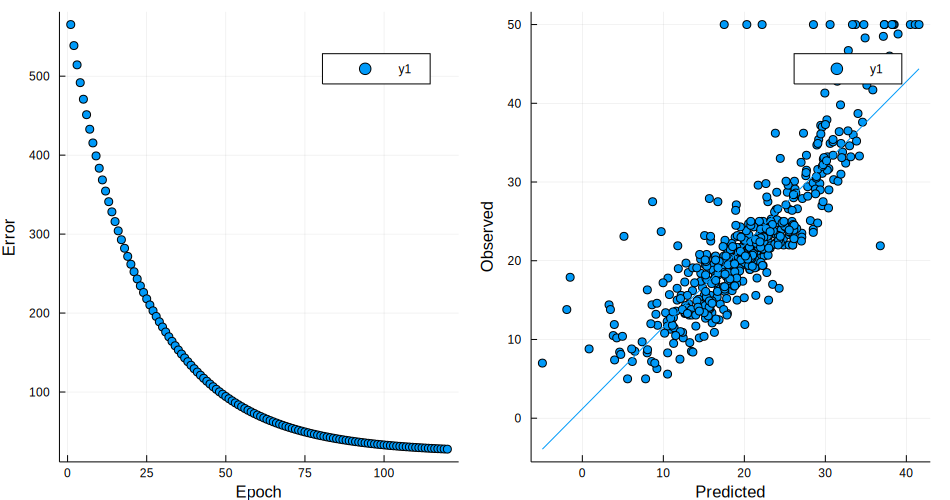

In [20]:

p1 = scatter(errdf[:,:Epoch], errdf[:,:Error], xlabel="Epoch", ylabel="Error")
p2 = scatter(predict(ω, x)', y', reg=true, xlabel="Predicted", ylabel="Observed")
plot(p1, p2, layout=(1,2), size=(950,500))

In [41]:


ω = [0.1f0*randn(Float32,64), zeros(Float32,1),
        0.1f0*randn(Float32,1), zeros(Float32,1),
        0.1f0*randn(Float32,1),  zeros(Float32,1)]


6-element Array{Array{Float32,1},1}:
 [0.0436031, 0.0040052, 0.0569993, -0.0433551, 0.346652, 0.105562, 0.116857, 0.126222, 0.0296844, -0.192866  …  0.0621457, -0.117952, -0.0362148, -0.0885078, -0.0665899, -0.0438309, -0.0763608, 0.0491333, 0.0667112, -0.0165852]
 [0.0]                                                                                                                                                                                                                             
 [-0.0389946]                                                                                                                                                                                                                      
 [0.0]                                                                                                                                                                                                                             
 [-0.0886627]                                      

In [43]:


#ω = Any[0.1f0*randn(Float32,64,13), zeros(Float32,64,1),
#        0.1f0*randn(Float32,15,64), zeros(Float32,15,1),
#        0.1f0*randn(Float32,1,15),  zeros(Float32,1,1)]
 

function predict(ω, x)
    x = mat(x)
    for i=1:2:length(ω)-2
        x = relu.(ω[i]*x .+ ω[i+1])
    end
    return ω[end-1]*x .+ ω[end]
end

loss(ω, x, y) = mean(abs2, predict(ω, x)-y)
lossgradient = grad(loss)

errdf = DataFrame(Epoch=1:60, Error=0.0)
let
    cntr = 1
    for i=1:600
        train(ω, [lstat,medv])
        if mod(i, 10) == 0
            errdf[cntr, :Epoch]=i
            errdf[cntr, :Error]=loss(ω,x,y)
            cntr+=1
        end
    end
end



Stacktrace:
 [1] #mat#228(::Int64, ::Function, ::Float64) at /home/russell/.julia/packages/Knet/05UDD/src/linalg.jl:162
 [2] mat(::Float64) at /home/russell/.julia/packages/Knet/05UDD/src/linalg.jl:162
 [3] predict(::Param{Array{Array{Float32,1},1}}, ::Float64) at ./In[43]:9
 [4] loss(::Param{Array{Array{Float32,1},1}}, ::Float64, ::Float64) at ./In[43]:16
 [5] #differentiate#3(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::Function, ::Param{Array{Array{Float32,1},1}}, ::Vararg{Any,N} where N) at /home/russell/.julia/packages/AutoGrad/FKOf4/src/core.jl:144
 [6] differentiate(::Function, ::Param{Array{Array{Float32,1},1}}, ::Vararg{Any,N} where N) at /home/russell/.julia/packages/AutoGrad/FKOf4/src/core.jl:135
 [7] (::getfield(AutoGrad, Symbol("##gradfun#6#7")){typeof(loss),Int64,Bool})(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::Array{Array{Float32,1},1}, ::Vararg{Any,N} where N) at /home/russell/.julia/p

MethodError: MethodError: no method matching reshape(::Float64, ::Int64, ::Colon)
Closest candidates are:
  reshape(!Matched::TrackedArray, ::Union{Colon, Int64}...) at /home/russell/.julia/packages/Tracker/SAr25/src/lib/array.jl:242
  reshape(!Matched::AbstractArray, ::Union{Colon, Int64}...) at reshapedarray.jl:116
  reshape(!Matched::AutoGrad.Value{##549}, ::Any...) where ##549 at none:0
  ...

In [35]:


#ω = Any[ 0.1*randn(size(lstat))]#, 0.0 ];
#ω = ω[1]


p3 = scatter(errdf[:,:Epoch], errdf[:,:Error], xlabel="Epoch", ylabel="Error")
p4 = scatter(predict(ω, x)', y', reg=true, xlabel="Predicted", ylabel="Observed")
# layout=(1,2), size=(950,500))
plot(p3, p4,layout=(1,2), size=(950,500))
# layout=(1,2), size=(950,500))#,png)
plot(p2, p4,layout=(1,2), size=(950,500))


xtrn, xtst = x[:, 1:400], x[:, 401:end]
ytrn, ytst = y[:, 1:400], y[:, 401:end]

ω = Any[0.1f0*randn(Float32,64,13), zeros(Float32,64,1),
        0.1f0*randn(Float32,15,64), zeros(Float32,15,1),
        0.1f0*randn(Float32,1,15),  zeros(Float32,1,1)]
errdf = DataFrame(Epoch=1:600, TrnError=0.0, ValError=0.0)
let
    cntr = 1
    @time for i=1:600
        train(ω, [(xtrn, ytrn)])
        if mod(i, 10) == 0
            errdf[cntr, :Epoch]=i
            errdf[cntr, :TrnError]=loss(ω,xtrn,ytrn)
            errdf[cntr, :ValError]=loss(ω,xtst,ytst)
            #print(cntr,errdf)#TrnError)
            cntr+=1
        end
    end
end

#using StatPlots
@df errdf[5:60,:] plot(:Epoch, [:ValError, :TrnError], xlabel="Epoch", ylabel="Error",
                       label=["Validation" "Training"], lw=3)

#After doing

#predict
#Epoch 10:



Stacktrace:
 [1] _generic_matmatmul!(::Array{Float64,2}, ::Char, ::Char, ::Array{Float32,2}, ::Array{Float64,2}) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/matmul.jl:591
 [2] generic_matmatmul!(::Array{Float64,2}, ::Char, ::Char, ::Array{Float32,2}, ::Array{Float64,2}) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/matmul.jl:581
 [3] * at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/matmul.jl:175 [inlined]
 [4] *(::Array{Float32,1}, ::Array{Float64,2}) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/matmul.jl:62
 [5] #forw#1(::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::Function, ::AutoGrad.Result{Array{Float32,1}}, ::Vararg{Any,N} where N) at /home/russell/.julia/packages/AutoGrad/FKOf4/src/core.jl:66
 [6] forw at /home/russell/.julia/packages/AutoGrad/FKOf4/src/core.jl

DimensionMismatch: DimensionMismatch("matrix A has dimensions (15,1), matrix B has dimensions (64,506)")

The data Frame below has columns, meaning:
* Training Error,
* Network training Epoch
* Network value error.

In [14]:

# lines(ddf$lstats,yhat,col=i,lty=i,lwd=2)}0.00.20.40.60.81.

# •fit the neural net model with size=100 
# and decay=.001, plot the fits. How does it look?
# Try runningthe fit at least twice to see that it changes.
# •Redo the the loop over decay values with size=100. 
#How does it look now? Do we need 100? Willdecay
# be more important with 100 than it was with 5 units?


In [15]:
errdf

,Epoch,Error
,Int64,Float64
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


In [16]:
cd(@__DIR__)


In [24]:
using Flux
using Flux.Tracker, Statistics, DelimitedFiles
using Flux.Tracker: Params, gradient, update!
#using Flux: gpu
using Flux: onehot, chunk, batchseq, throttle, crossentropy
#using Flux: @epochs

using CSV, DataFrames
file = "BostonHousing.csv"

df = DataFrame(CSV.File(file)) #|> DataFrame!
#df[:medv]
#
lstat = df[:lstat]
medv = df[:medv]

506-element Array{Union{Missing, Float64},1}:
 24.0
 21.6
 34.7
 33.4
 36.2
 28.7
 22.9
 27.1
 16.5
 18.9
 15.0
 18.9
 21.7
  ⋮  
 24.5
 23.1
 19.7
 18.3
 21.2
 17.5
 16.8
 22.4
 20.6
 23.9
 22.0
 11.9